In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from ipywidgets import widgets

#import re
# import dash
# import dash_core_components as dcc
# import dash_html_components as html

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
%matplotlib inline

In [2]:
donations=pd.read_pickle('donations_cohort_with_cycle.pkl')

In [2]:
for col in donations.columns:
    print(col)

NameError: name 'donations' is not defined

In [4]:
#group by TF columns and sum amount donated by the 16 groups
# create new column showing percentage of total amount
sun_amount=donations.groupby(['cohort_yr0_TF', 'cohort_yr1_TF', 'cohort_yr2_TF', 'cohort_yr3_TF', 'cohort_yr4_TF']).sum()['amount_total'].reset_index()
sun_amount['perc_amount_total']= sun_amount['amount_total']/sun_amount['amount_total'].sum()

In [5]:
#group by TF columns and sum amount donated by the 16 groups
sun_count=donations.groupby(['cohort_yr0_TF', 'cohort_yr1_TF', 'cohort_yr2_TF', 'cohort_yr3_TF', 'cohort_yr4_TF']).count()['id'].reset_index()
sun_count['perc_cohort_donors']= sun_count['id']/sun_count['id'].sum()

In [6]:
# sun_count.to_csv('sun_count.csv')

In [33]:
df['amount_yr1'].sum()

46336245.720000006

In [10]:
df['amount_total'].describe().round(0)

count    2024554.0
mean         127.0
std         2219.0
min            0.0
25%           25.0
50%           50.0
75%          100.0
max      1836958.0
Name: amount_total, dtype: float64

In [13]:
df.groupby('cohort').count()['id'].round(0)

cohort
0              141
cohort13    320069
cohort14    320673
cohort15    355137
cohort16    445598
cohort17    434991
cohort18    147945
Name: id, dtype: int64

In [50]:
df[['cohort', 'first_gift']].groupby(['cohort'], as_index=False).mean().sort_values(by='first_gift', ascending=False)


,cohort,first_gift
6,cohort18,1.000000
3,cohort15,0.009954
2,cohort14,0.008417
1,cohort13,0.007611
0,0,0.007092
4,cohort16,0.000000
5,cohort17,0.000000


In [23]:
pd.cut(df['amount_yr0'], 50).value_counts().sort_index()

(-634.7, 12694.209]         2024338
(12694.209, 25388.408]          157
(25388.408, 38082.608]           34
(38082.608, 50776.807]            5
(50776.807, 63471.006]            4
(63471.006, 76165.205]            3
(76165.205, 88859.404]            3
(88859.404, 101553.604]           4
(101553.604, 114247.803]          2
(114247.803, 126942.002]          0
(126942.002, 139636.201]          0
(139636.201, 152330.4]            1
(152330.4, 165024.6]              1
(165024.6, 177718.799]            0
(177718.799, 190412.998]          0
(190412.998, 203107.197]          0
(203107.197, 215801.396]          0
(215801.396, 228495.596]          0
(228495.596, 241189.795]          0
(241189.795, 253883.994]          0
(253883.994, 266578.193]          0
(266578.193, 279272.392]          0
(279272.392, 291966.592]          0
(291966.592, 304660.791]          0
(304660.791, 317354.99]           0
(317354.99, 330049.189]           0
(330049.189, 342743.388]          0
(342743.388, 355437.588]    

In [118]:
print(f'amount_yr0')
print(f'number donors overall: ', df.count()['id'])

print(f'number donors under $10: ', df.query('amount_yr0 <= 10').count()['id'])
print(f'% donors under $10: ', df.query('amount_yr0 <= 10').count()['id']/df.count()['id']*100)

print(f'number donors under $50: ', df.query('amount_yr0 <= 50').count()['id'])
print(f'% donors under $50: ', df.query('amount_yr0 <= 50').count()['id']/df.count()['id']*100)

print(f'number donors under $100: ', df.query('amount_yr0 <= 100').count()['id'])
print(f'% donors under $100: ', df.query('amount_yr0 <= 100').count()['id']/df.count()['id']*100)

print(f'number donors under $1000: ', df.query('amount_yr0 <= 1000').count()['id'])
print(f'% donors under $1000: ', df.query('amount_yr0 <= 1000').count()['id']/df.count()['id']*100)

amount_yr0
number donors overall:  2024554
number donors under $10:  231347
% donors under $10:  11.427059984569441
number donors under $50:  1433381
% donors under $50:  70.7998403599015
number donors under $100:  1757016
% donors under $100:  86.78533642471379
number donors under $1000:  2012449
% donors under $1000:  99.40209053450785


In [121]:
df_count=df.query('amount_yr1 > 0').count()['id']

print(f'amount_yr1')

print(f'number donors overall: ', df_count)

print(f'number donors under $10: ', df.query('amount_yr1 > 0 & amount_yr1 <= 10').count()['id'])
print(f'% donors under $10: ', df.query('amount_yr1 > 0 & amount_yr1 <= 10').count()['id']/df_count*100)

print(f'number donors under $50: ', df.query('amount_yr1 > 0 & amount_yr1 <= 50').count()['id'])
print(f'% donors under $50: ', df.query('amount_yr1 > 0 & amount_yr1 <= 50').count()['id']/df_count*100)

print(f'number donors under $100: ', df.query('amount_yr1 > 0 & amount_yr1 <= 100').count()['id'])
print(f'% donors under $100: ', df.query('amount_yr1 > 0 & amount_yr1 <= 100').count()['id']/df_count*100)

print(f'number donors under $1000: ', df.query('amount_yr1 > 0 & amount_yr1 <= 1000').count()['id'])
print(f'% donors under $1000: ', df.query('amount_yr1 > 0 & amount_yr1 <= 1000').count()['id']/df_count*100)

amount_yr1
number donors overall:  243436
number donors under $10:  23489
% donors under $10:  9.648942637900722
number donors under $50:  130332
% donors under $50:  53.53850704086495
number donors under $100:  174207
% donors under $100:  71.56172464220576
number donors under $1000:  237140
% donors under $1000:  97.41369394830674


In [122]:
df3=df

In [128]:
df3['number_in_range_yr0']=np.where(df3['amount_yr0'] <= 10, df.query('amount_yr0 <= 10').count()['id'], "n/a")

In [128]:
df3['number_in_range_yr0']=df.query('amount_yr0 <= 10').count()['id'], "n/a")

In [129]:
df3.number_in_range_yr0.value_counts()

n/a       1793207
231347     231347
Name: number_in_range_yr0, dtype: int64

In [130]:
df3

,id,first_gift_year,lapsed_count,recovered_count,max_consec_giving_years,total_giving_years,count_2013,count_2014,count_2015,count_2016,...,count_total,cohort_gift_pattern,cohort_yr0_TF,cohort_yr1_TF,cohort_yr2_TF,cohort_yr3_TF,cohort_yr4_TF,cohort,first_gift_year_year,number_in_range_yr0
0,00000ce845c00cbf0686c992fc369df4,2013-01-01,2,1,1,1,1,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort13,2013,n/a
1,00002783bc5d108510f3f9666c8b1edd,2016-01-01,2,1,1,1,0,0,0,1,...,1,"0,",T,TF,TFF,TFFF,T,cohort16,2016,n/a
2,00002d44003ed46b066607c5455a999a,2016-01-01,2,2,2,2,0,0,0,1,...,11,"0,1,",T,TT,TTF,TTFF,TT,cohort16,2016,231347
3,00002eb25d60a09c318efbd0797bffb5,2015-01-01,4,4,4,4,0,0,1,1,...,4,"0,1,2,3,",T,TT,TTT,TTTT,TTTT,cohort15,2015,n/a
4,0000300773fe015f870914b42528541b,2017-01-01,2,1,1,1,0,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort17,2017,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024549,ffffb91addfb35f11b30c2943f349654,2017-01-01,2,1,1,1,0,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort17,2017,231347
2024550,ffffc2e1225ac40a3ace9b8562115c9b,2016-01-01,2,1,1,1,0,0,0,1,...,1,"0,",T,TF,TFF,TFFF,T,cohort16,2016,n/a
2024551,ffffd8f0fbfa10b99efe90a5ee13c5df,2017-01-01,2,1,1,1,0,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort17,2017,n/a
2024552,ffffdb40226605870f62422b2b420aab,2017-01-01,2,1,1,1,0,0,0,0,...,1,"0,",T,TF,TFF,TFFF,T,cohort17,2017,n/a


In [97]:
df1 = df.amount_yr0.value_counts().rename_axis('amount_yr0').reset_index(name='count')
df1['percentage']=(df.amount_yr0.value_counts(normalize=True)).reset_index()['amount_yr0']

In [99]:
df1.to_csv('amount_yr0_counts.csv')

In [100]:
not0=df.query('amount_yr1 != 0')
df2 = not0.amount_yr1.value_counts().rename_axis('amount_yr0').reset_index(name='count')
df2['percentage']=(not0.amount_yr1.value_counts(normalize=True)).reset_index()['amount_yr1']

In [101]:
df2.to_csv('amount_yr1_counts.csv')

In [102]:
df1

,amount_yr0,count,percentage
0,25.00,473938,2.340950e-01
1,50.00,419025,2.069715e-01
2,100.00,178299,8.806829e-02
3,10.00,175615,8.674256e-02
4,20.00,139023,6.866846e-02
...,...,...,...
63636,1049.64,1,4.939359e-07
63637,317.97,1,4.939359e-07
63638,213.57,1,4.939359e-07
63639,711.39,1,4.939359e-07


In [105]:
df1['amount_yr0'].quantile([.1, .2,.3,.4, .5])

0.1     67.25
0.2    132.36
0.3    199.98
0.4    272.11
0.5    355.69
Name: amount_yr0, dtype: float64

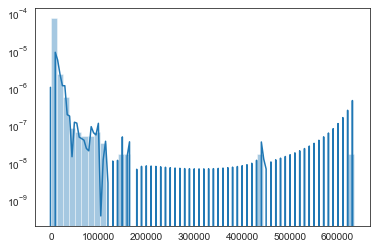

In [111]:
ax=sns.distplot(x);
ax.set_yscale('log')

In [ ]:
conditions = [
    (df['Set'] == 'Z') & (df['Type'] == 'A'),
    (df['Set'] == 'Z') & (df['Type'] == 'B'),
    (df['Type'] == 'B')]
choices = ['yellow', 'blue', 'purple']
df['color'] = np.select(conditions, choices, default='black')
print(df)

In [152]:
conditions=[
    (df3['amount_yr0'] <= 10),
    (df3['amount_yr0'] > 10) & (df3['amount_yr0'] <= 15),
    (df3['amount_yr0'] > 15) & (df3['amount_yr0'] <= 20),
    (df3['amount_yr0'] > 20) & (df3['amount_yr0'] <= 25),
    (df3['amount_yr0'] > 25) & (df3['amount_yr0'] <= 50),
    (df3['amount_yr0'] > 50) & (df3['amount_yr0'] <= 75),
    (df3['amount_yr0'] > 75) & (df3['amount_yr0'] <= 100),
    (df3['amount_yr0'] > 100) & (df3['amount_yr0'] <= 1000),
    (df3['amount_yr0'] > 1000)
]

choices = ['upto10', 'over10upto15', 'over15upto20', 'over20upto25','over25upto50', 'over50upto75', 'over75upto100', 'over100upto1000', 'over1000']
df3['amount_yr0_groups'] = np.select(conditions, choices, default = 'none')

In [153]:
(df3.amount_yr0_groups.value_counts(normalize=True)*100).reset_index()

,index,amount_yr0_groups
0,over25upto50,26.564073
1,over20upto25,23.725719
2,over100upto1000,12.616754
3,over75upto100,11.789510
4,upto10,11.427060
5,over15upto20,7.165183
6,over50upto75,4.195986
7,over10upto15,1.917805
8,over1000,0.597909
